In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import torch
torch.cuda.empty_cache()

#**Training**

In [ ]:
!python /content/drive/MyDrive/FetalCPSeg/Train.py --data_path="/content/drive/MyDrive/FetalCPSeg/Data/" --output_path="/content/drive/MyDrive/FetalCPSeg/output/" --num_iteration=4000 --pre_fre=10 --val_fre=5 --early_stopping=100

#**Inference**

In [37]:
!python /content/drive/MyDrive/FetalCPSeg/Infer.py --data_path="/content/drive/MyDrive/FetalCPSeg/Data/" --output_path="/content/drive/MyDrive/FetalCPSeg/output/" --weights="/content/drive/MyDrive/FetalCPSeg/output/ckpt/best_val.pth.gz"

Reading Data...
Finished! Train:6 Val:2 Test:4
Start inference for image : /content/drive/MyDrive/FetalCPSeg/Data/test/21-T2SPIR-src.nii.gz
/content/drive/MyDrive/FetalCPSeg/Infer.py:78: FutureWarning: Image data has type int64, which may cause incompatibilities with other tools. This will error in NiBabel 5.0. This warning can be silenced by passing the dtype argument to Nifti1Image().
  predict_nii = nib.Nifti1Image(predict.cpu().data.numpy(), affine=None)
Images Saved
[0] Testing Finished, Cost 2.70s
Start inference for image : /content/drive/MyDrive/FetalCPSeg/Data/test/22-T2SPIR-src.nii.gz
Images Saved
[1] Testing Finished, Cost 1.64s
Start inference for image : /content/drive/MyDrive/FetalCPSeg/Data/test/32-T2SPIR-src.nii.gz
Images Saved
[2] Testing Finished, Cost 1.86s
Start inference for image : /content/drive/MyDrive/FetalCPSeg/Data/test/39-T2SPIR-src.nii.gz
Images Saved
[3] Testing Finished, Cost 1.29s


#**Imports**

In [4]:
import matplotlib.pyplot as plt
import nibabel
import numpy as np
import torch

#**Training and Validation loss**

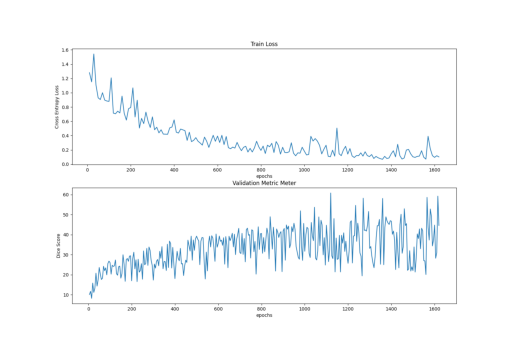

In [38]:
loss = plt.imread(f'/content/drive/MyDrive/FetalCPSeg/output/Train_val_loss.png')

plt.imshow(loss)
plt.axis('off')
plt.show()

#**Check real segmentation of training images**

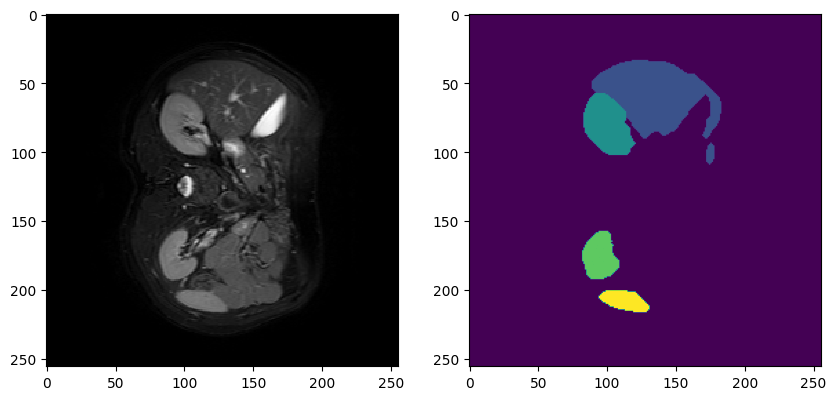

In [ ]:
image = nibabel.load('/content/drive/MyDrive/FetalCPSeg/Data/train/01-T2SPIR-src.nii.gz')
mask = nibabel.load('/content/drive/MyDrive/FetalCPSeg/Data/train/01-T2SPIR-mask.nii.gz')

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(image.get_fdata()[:,:,20], cmap='gray', interpolation='nearest')
plt.subplot(1, 2, 2)
plt.imshow(mask.get_fdata()[:,:,20].astype(np.uint8),vmin=0,vmax=4)
plt.show()

#**Check Segmentation during training**

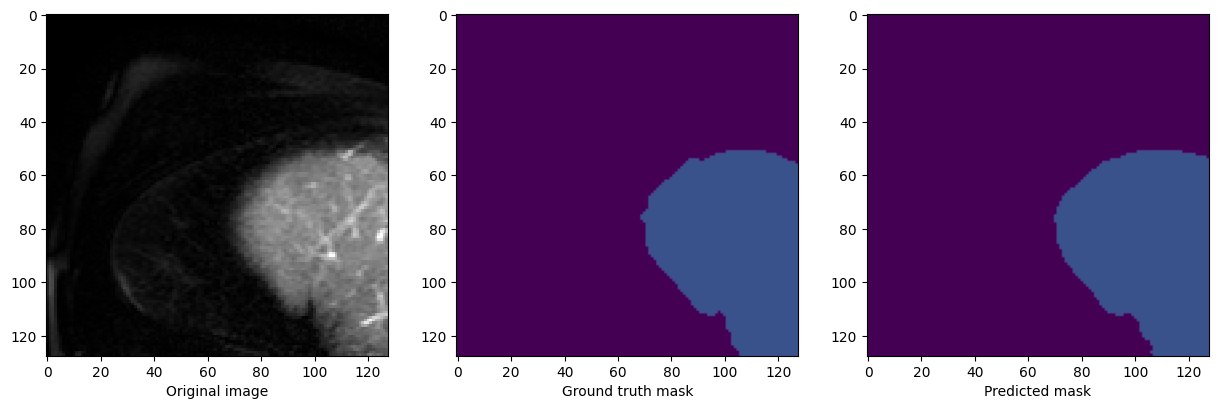

In [24]:
epoch = 4000
image = nibabel.load(f'/content/drive/MyDrive/FetalCPSeg/output/train_images/{epoch}/image.nii.gz')
label = nibabel.load(f'/content/drive/MyDrive/FetalCPSeg/output/train_images/{epoch}/label.nii.gz')
mask = nibabel.load(f'/content/drive/MyDrive/FetalCPSeg/output/train_images/{epoch}/predict.nii.gz')

plt.figure(figsize=(15, 10))
plt.subplot(1, 3, 1)
plt.xlabel('Original image')
plt.imshow(image.get_fdata()[:,:,20], cmap='gray', interpolation='nearest')
plt.subplot(1, 3, 2)
plt.xlabel('Ground truth mask')
plt.imshow(label.get_fdata()[:,:,20].astype(np.uint8),vmin=0,vmax=4)
plt.subplot(1, 3, 3)
plt.xlabel('Predicted mask')
plt.imshow(mask.get_fdata()[:,:,20].astype(np.uint8),vmin=0,vmax=4)
plt.show()

#**Check Segmentation during validation**:

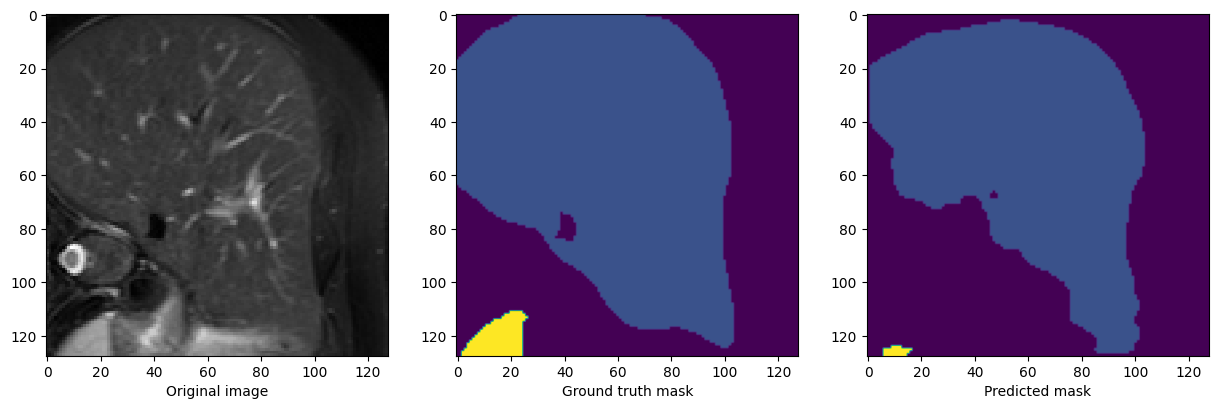

In [30]:
epoch=3950
image = nibabel.load(f'/content/drive/MyDrive/FetalCPSeg/output/val_images/{epoch}/image.nii.gz')
label = nibabel.load(f'/content/drive/MyDrive/FetalCPSeg/output/val_images/{epoch}/label.nii.gz')
mask = nibabel.load(f'/content/drive/MyDrive/FetalCPSeg/output/val_images/{epoch}/predict.nii.gz')

plt.figure(figsize=(15, 10))
plt.subplot(1, 3, 1)
plt.xlabel('Original image')
plt.imshow(image.get_fdata()[:,:,20], cmap='gray', interpolation='nearest')
plt.subplot(1, 3, 2)
plt.xlabel('Ground truth mask')
plt.imshow(label.get_fdata()[:,:,20].astype(np.uint8),vmin=0,vmax=4)
plt.subplot(1, 3, 3)
plt.xlabel('Predicted mask')
plt.imshow(mask.get_fdata()[:,:,20].astype(np.uint8),vmin=0,vmax=4)
plt.show()

#**Check Segmentation during inference:**

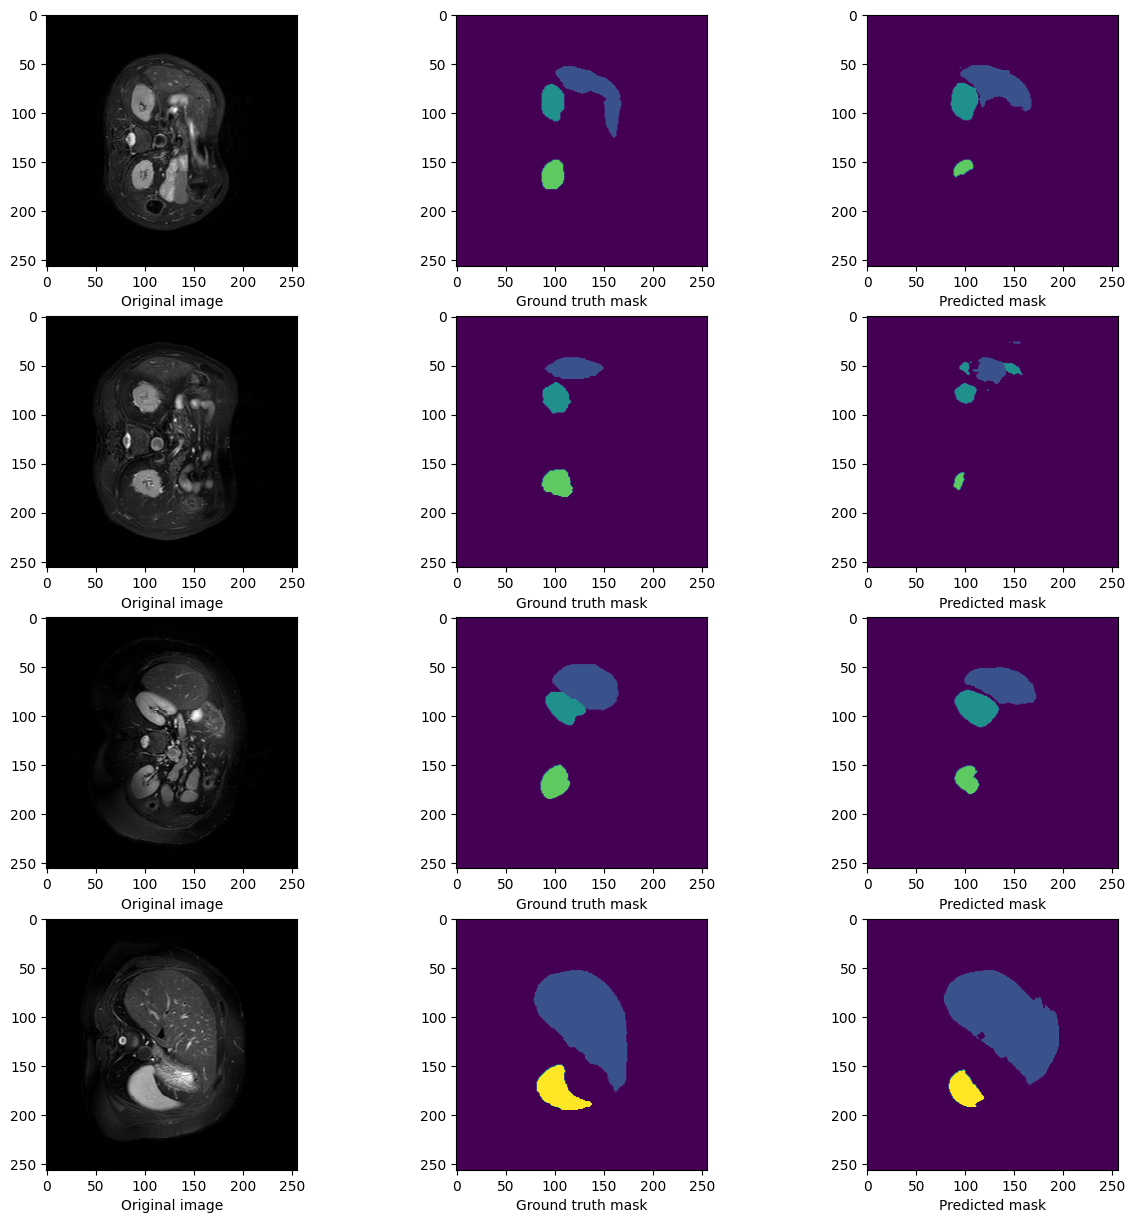

In [34]:
image1 = nibabel.load('/content/drive/MyDrive/FetalCPSeg/output/test_images/0/image.nii.gz')
mask1 = nibabel.load('/content/drive/MyDrive/FetalCPSeg/output/test_images/0/predict.nii.gz')
label1 = nibabel.load('/content/drive/MyDrive/FetalCPSeg/Data/test_gt/21-T2SPIR-mask.nii.gz')

image2 = nibabel.load('/content/drive/MyDrive/FetalCPSeg/output/test_images/1/image.nii.gz')
mask2 = nibabel.load('/content/drive/MyDrive/FetalCPSeg/output/test_images/1/predict.nii.gz')
label2 = nibabel.load('/content/drive/MyDrive/FetalCPSeg/Data/test_gt/22-T2SPIR-mask.nii.gz')

image3 = nibabel.load('/content/drive/MyDrive/FetalCPSeg/output/test_images/2/image.nii.gz')
mask3 = nibabel.load('/content/drive/MyDrive/FetalCPSeg/output/test_images/2/predict.nii.gz')
label3 = nibabel.load('/content/drive/MyDrive/FetalCPSeg/Data/test_gt/32-T2SPIR-mask.nii.gz')

image4 = nibabel.load('/content/drive/MyDrive/FetalCPSeg/output/test_images/3/image.nii.gz')
mask4 = nibabel.load('/content/drive/MyDrive/FetalCPSeg/output/test_images/3/predict.nii.gz')
label4 = nibabel.load('/content/drive/MyDrive/FetalCPSeg/Data/test_gt/39-T2SPIR-mask.nii.gz')

plt.figure(figsize=(15, 15))

plt.subplot(4, 3, 1)
plt.xlabel('Original image')
plt.imshow(image1.get_fdata()[:,:,15], cmap='gray', interpolation='nearest')
plt.subplot(4, 3, 2)
plt.xlabel('Ground truth mask')
plt.imshow(label1.get_fdata()[:,:,15].astype(np.uint8),vmin=0,vmax=4)
plt.subplot(4, 3, 3)
plt.xlabel('Predicted mask')
plt.imshow(mask1.get_fdata()[:,:,15].astype(np.uint8),vmin=0,vmax=4)

plt.subplot(4, 3, 4)
plt.xlabel('Original image')
plt.imshow(image2.get_fdata()[:,:,15], cmap='gray', interpolation='nearest')
plt.subplot(4, 3, 5)
plt.xlabel('Ground truth mask')
plt.imshow(label2.get_fdata()[:,:,15].astype(np.uint8),vmin=0,vmax=4)
plt.subplot(4, 3, 6)
plt.xlabel('Predicted mask')
plt.imshow(mask2.get_fdata()[:,:,15].astype(np.uint8),vmin=0,vmax=4)

plt.subplot(4, 3, 7)
plt.xlabel('Original image')
plt.imshow(image3.get_fdata()[:,:,15], cmap='gray', interpolation='nearest')
plt.subplot(4, 3, 8)
plt.xlabel('Ground truth mask')
plt.imshow(label3.get_fdata()[:,:,15].astype(np.uint8),vmin=0,vmax=4)
plt.subplot(4, 3, 9)
plt.xlabel('Predicted mask')
plt.imshow(mask3.get_fdata()[:,:,15].astype(np.uint8),vmin=0,vmax=4)

plt.subplot(4, 3, 10)
plt.xlabel('Original image')
plt.imshow(image3.get_fdata()[:,:,30], cmap='gray', interpolation='nearest')
plt.subplot(4, 3, 11)
plt.xlabel('Ground truth mask')
plt.imshow(label3.get_fdata()[:,:,30].astype(np.uint8),vmin=0,vmax=4)
plt.subplot(4, 3, 12)
plt.xlabel('Predicted mask')
plt.imshow(mask3.get_fdata()[:,:,30].astype(np.uint8),vmin=0,vmax=4)

plt.show()

# **Evaluation**

In [8]:
def compute_dice(res, gt, label):
    A = gt == label
    B = res == label
    TP = len(np.nonzero(A*B)[0])
    FN = len(np.nonzero(A*(~B))[0])
    FP = len(np.nonzero((~A)*B)[0])
    DICE = 0
    if (FP+2*TP+FN) != 0:
        DICE = float(2)*TP/(FP+2*TP+FN)
    return DICE*100

In [9]:
def compute_dice_exam(seg, mask):
    dice_liver = compute_dice(seg, mask, 1)
    dice_rkidney = compute_dice(seg, mask, 2)
    dice_lkidney = compute_dice(seg, mask, 3)
    dice_spleen = compute_dice(seg, mask, 4)
    return dice_liver, dice_rkidney, dice_lkidney, dice_spleen

In [35]:
dice1 = compute_dice_exam(mask1.get_fdata(), label1.get_fdata())
dice2 = compute_dice_exam(mask2.get_fdata(), label2.get_fdata())
dice3 = compute_dice_exam(mask3.get_fdata(), label3.get_fdata())
dice4 = compute_dice_exam(mask4.get_fdata(), label4.get_fdata())

dice_liver = np.mean([dice1[0], dice2[0], dice3[0], dice4[0]])
dice_rkidney = np.mean([dice1[1], dice2[1], dice3[1], dice4[1]])
dice_lkidney = np.mean([dice1[2], dice2[2], dice3[2], dice4[2]])
dice_spleen = np.mean([dice1[3], dice2[3], dice3[3], dice4[3]])

overall_dice = np.mean([dice_liver, dice_rkidney, dice_lkidney, dice_spleen])

print("Dice score for image 1:", dice1)
print("Dice score for image 2:", dice2)
print("Dice score for image 3:", dice3)
print("Dice score for image 4:", dice4)

print("Dice score for the liver:", dice_liver, "the right kidney:", dice_rkidney, "the left kidney :", dice_lkidney, "the spleen :", dice_spleen)
print("The overall dice :", overall_dice)


Dice score for image 1: (88.77532433362343, 86.47786946736684, 42.022027675797794, 87.31059341832989)
Dice score for image 2: (54.45905313630991, 61.51555071882696, 4.169860493637897, 0.045341192473362046)
Dice score for image 3: (84.54774454393429, 80.66349126765272, 74.56168313675487, 70.02477291494633)
Dice score for image 4: (80.41911764705883, 86.81378242353853, 71.5847496554892, 83.3030566305979)
Dice score for the liver: 77.05030991523162 the right kidney: 78.86767346934627 the left kidney : 48.08458024041994 the spleen : 60.17094103908687
The overall dice : 66.04337616602118
